In [1]:
#Exercise 1: Duplicate Detection and Removal
## Load the titanic dataset

### Setup: Install and configure Kaggle API
!pip install -q kaggle
### Installs the kaggle Python package so you can access datasets directly
### from Kaggle competitions using code.

from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#
!kaggle competitions download -c titanic
!unzip -q titanic.zip


Saving kaggle.json to kaggle.json
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 126MB/s]


In [2]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')

# Explore the dataset
print(titanic_data.head())
print(titanic_data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
print("Number of rows:", titanic_data.shape[0])

Number of rows: 891


In [7]:
### Identify if there are any duplicate rows based on all columns.
# Check for duplicate rows
duplicate_mask = titanic_data.duplicated()
print("Number of duplicate rows:", duplicate_mask.sum())

Number of duplicate rows: 0


In [8]:
### Remove any duplicate rows found in the dataset.

titanic_data = titanic_data.drop_duplicates()
print("Remaining duplicates:", titanic_data.duplicated().sum())

Remaining duplicates: 0


In [9]:
### Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.
rows_before = titanic_data.shape[0]

titanic_data_no_duplicates = titanic_data.drop_duplicates()
rows_after = titanic_data_no_duplicates.shape[0]

print("Before:", rows_before, "After after:", rows_after)

Before: 891 After after: 891


## Exercise 2: Handling Missing Values Instructions

### Identify columns in the Titanic dataset with missing values.

### Explore different strategies for handling missing data, such as removal, imputation, and filling with a constant value.

### Apply each strategy to different columns based on the nature of the data.

In [39]:
import pandas as pd

# Check for columns with missing values
missing_columns = titanic_data.columns[titanic_data.isnull().any()]
print("Columns with missing values:", list(missing_columns))

# determine how much is missing
missing_percent = titanic_data.isnull().mean() * 100
print(missing_percent[missing_percent > 0])

## age column: solution to insert mean age to avoid further skewing results
mean_age = titanic_data['Age'].mean()

## Fill with mean
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())

# just confirming
mean_age = titanic_data["Age"].mean()
print(mean_age, titanic_data['Age'].isnull() .sum())

## cabin column: what type of data and results
print(titanic_data["Cabin"].head(50))

## since 77% of cabin is missing, and its too risky to delete, I will mark as "Unknown"
titanic_data['Cabin'] = titanic_data['Cabin'].fillna("Unknown").replace("", "Unknown")
print(titanic_data["Cabin"].head(50))

#Embarked column: .22% is empty.
# Count missing values in each column
missing_embarked = titanic_data.isnull().sum()
print(missing_embarked)

titanic_data = titanic_data.dropna(subset=['Embarked'])
print("New shape after dropping rows:", titanic_data.shape)


New shape after dropping rows: (889, 12)


## Exercise 3 - feature engineering instructions

### Create new features, such as Family Size from SibSp and Parch, and Title extracted from the Name column.

### Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.

### You will encode new categorical features (like Title) here, but do not scale numerical features yet — that will come after outlier handling.

In [41]:
titanic_data["FamilySize"] = titanic_data["SibSp"] + titanic_data["Parch"] + 1
print(titanic_data[["SibSp", "Parch", "FamilySize"]].head())

titanic_data["Title"] = titanic_data["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)

print(titanic_data[["Name", "Title"]].head(10))

titanic_data = pd.get_dummies(titanic_data, columns=["Sex", "Embarked", "Title"])

print(titanic_data.head())

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1
                                                Name   Title
0                            Braund, Mr. Owen Harris      Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                             Heikkinen, Miss. Laina    Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                           Allen, Mr. William Henry      Mr
5                                   Moran, Mr. James      Mr
6                            McCarthy, Mr. Timothy J      Mr
7                     Palsson, Master. Gosta Leonard  Master
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs
9                Nasser, Mrs. Nicholas (Adele Achem)     Mrs
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4   

#Exercise 4 - Outlier detection and handling



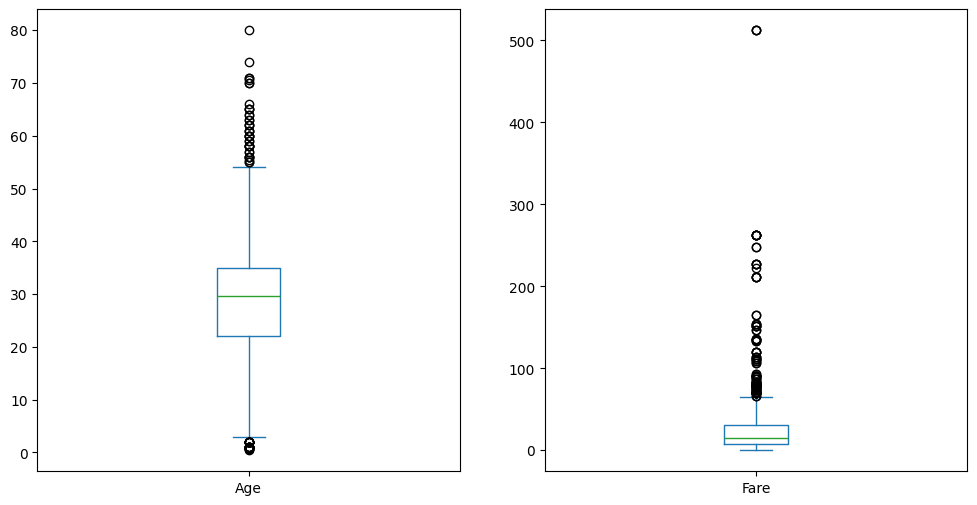

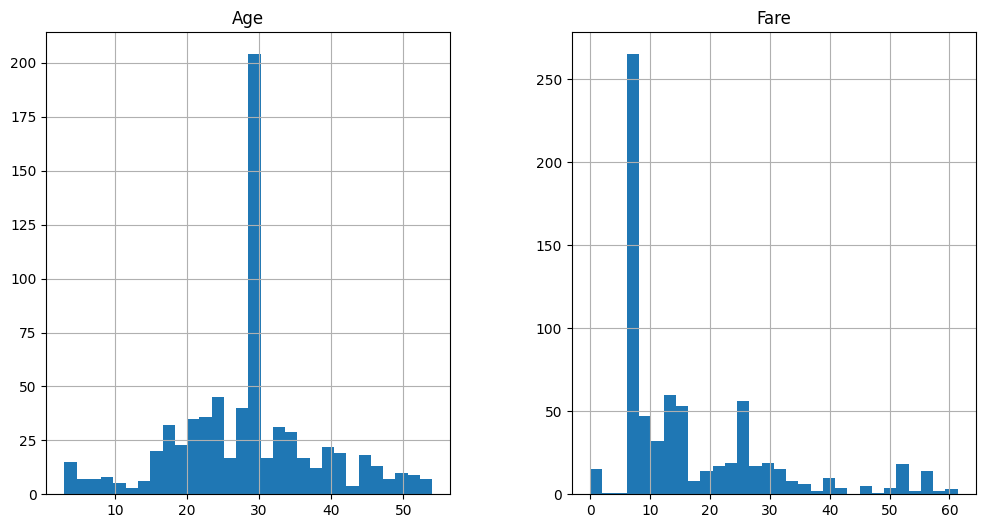

In [42]:
import matplotlib.pyplot as plt
import numpy as np

titanic_data[['Age','Fare']].plot(kind='box', subplots=True, layout=(1,2), figsize=(12,6))
plt.show()

Q1 = titanic_data['Age'].quantile(0.25)
Q3 = titanic_data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_age = Q1 - 1.5 * IQR
upper_age = Q3 + 1.5 * IQR
titanic_data = titanic_data[(titanic_data['Age'] >= lower_age) & (titanic_data['Age'] <= upper_age)]

Q1 = titanic_data['Fare'].quantile(0.25)
Q3 = titanic_data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_fare = Q1 - 1.5 * IQR
upper_fare = Q3 + 1.5 * IQR
titanic_data = titanic_data[(titanic_data['Fare'] >= lower_fare) & (titanic_data['Fare'] <= upper_fare)]

titanic_data[['Age','Fare']].hist(bins=30, figsize=(12,6))
plt.show()

In [43]:
## Exercise 5

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
titanic_data[['Age_std','Fare_std','FamilySize_std']] = scaler.fit_transform(
    titanic_data[['Age','Fare','FamilySize']]
)

minmax = MinMaxScaler()
titanic_data[['Age_norm','Fare_norm','FamilySize_norm']] = minmax.fit_transform(
    titanic_data[['Age','Fare','FamilySize']]
)

print(titanic_data[['Age','Age_std','Age_norm']].head())


         Age   Age_std  Age_norm
0  22.000000 -0.644501  0.372549
2  26.000000 -0.245599  0.450980
3  35.000000  0.651930  0.627451
4  35.000000  0.651930  0.627451
5  29.699118  0.123297  0.523512


In [45]:
##Exercise 6 - FEature Encoding

import pandas as pd
from sklearn.preprocessing import LabelEncoder

titanic_data = titanic_data.drop(columns=['Name','Ticket'])

# One-hot encode Cabin
titanic_data = pd.get_dummies(titanic_data, columns=['Cabin'], drop_first=True)

print(titanic_data.head())
print(titanic_data.info())


   PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare  \
0            1         0       3  22.000000      1      0   7.2500   
2            3         1       3  26.000000      0      0   7.9250   
3            4         1       1  35.000000      1      0  53.1000   
4            5         0       3  35.000000      0      0   8.0500   
5            6         0       3  29.699118      0      0   8.4583   

   FamilySize  Sex_female  Sex_male  ...  Cabin_F E69  Cabin_F G63  \
0           2       False      True  ...        False        False   
2           1        True     False  ...        False        False   
3           2        True     False  ...        False        False   
4           1       False      True  ...        False        False   
5           1       False      True  ...        False        False   

   Cabin_F G73  Cabin_F2  Cabin_F33  Cabin_F38  Cabin_F4  Cabin_G6  Cabin_T  \
0        False     False      False      False     False     False    False   


In [46]:
## Exericse 7

import pandas as pd

# 1. Define age bins and labels
bins = [0, 12, 18, 60, 100]
labels = ["Child", "Teen", "Adult", "Senior"]

# 2. Create AgeGroup column
titanic_data["AgeGroup"] = pd.cut(titanic_data["Age"], bins=bins, labels=labels, include_lowest=True)

print(titanic_data[["Age", "AgeGroup"]].head(15))

# 3. One-hot encode AgeGroup
titanic_data = pd.get_dummies(titanic_data, columns=["AgeGroup"], drop_first=True)

print(titanic_data.head())

          Age AgeGroup
0   22.000000    Adult
2   26.000000    Adult
3   35.000000    Adult
4   35.000000    Adult
5   29.699118    Adult
6   54.000000    Adult
8   27.000000    Adult
9   14.000000     Teen
10   4.000000    Child
12  20.000000    Adult
13  39.000000    Adult
14  14.000000     Teen
17  29.699118    Adult
18  31.000000    Adult
19  29.699118    Adult
   PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare  \
0            1         0       3  22.000000      1      0   7.2500   
2            3         1       3  26.000000      0      0   7.9250   
3            4         1       1  35.000000      1      0  53.1000   
4            5         0       3  35.000000      0      0   8.0500   
5            6         0       3  29.699118      0      0   8.4583   

   FamilySize  Sex_female  Sex_male  ...  Cabin_F2  Cabin_F33  Cabin_F38  \
0           2       False      True  ...     False      False      False   
2           1        True     False  ...     False      Fal


# Count missing values in each column
missing_counts = df.isnull().sum()
print(missing_counts)


# 1. Identify missing values
print(titanic_data.isnull().sum())
